In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
544,13.870,20.70,89.77,584.8,0.09578,0.10180,0.036880,0.023690,0.1620,0.06688,...,15.050,24.75,99.17,688.6,0.1264,0.2037,0.13770,0.06845,0.2249,0.08492
87,19.020,24.59,122.00,1076.0,0.09029,0.12060,0.146800,0.082710,0.1953,0.05629,...,24.560,30.41,152.90,1623.0,0.1249,0.3206,0.57550,0.19560,0.3956,0.09288
423,13.660,19.13,89.46,575.3,0.09057,0.11470,0.096570,0.048120,0.1848,0.06181,...,15.140,25.50,101.40,708.8,0.1147,0.3167,0.36600,0.14070,0.2744,0.08839
230,17.050,19.08,113.40,895.0,0.11410,0.15720,0.191000,0.109000,0.2131,0.06325,...,19.590,24.89,133.50,1189.0,0.1703,0.3934,0.50180,0.25430,0.3109,0.09061
108,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.182300,0.2556,0.07039,...,28.400,28.01,206.80,2360.0,0.1701,0.6997,0.96080,0.29100,0.4055,0.09789
61,8.598,20.98,54.66,221.8,0.12430,0.08963,0.030000,0.009259,0.1828,0.06757,...,9.565,27.04,62.06,273.9,0.1639,0.1698,0.09001,0.02778,0.2972,0.07712
185,10.080,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,...,11.870,21.18,75.39,437.0,0.1521,0.1019,0.00692,0.01042,0.2933,0.07697
271,11.290,13.04,72.23,388.0,0.09834,0.07608,0.032650,0.027550,0.1769,0.06270,...,12.320,16.18,78.27,457.5,0.1358,0.1507,0.12750,0.08750,0.2733,0.08022
216,11.890,18.35,77.32,432.2,0.09363,0.11540,0.066360,0.031420,0.1967,0.06314,...,13.250,27.10,86.20,531.2,0.1405,0.3046,0.28060,0.11380,0.3397,0.08365
132,16.160,21.54,106.20,809.8,0.10080,0.12840,0.104300,0.056130,0.2160,0.05891,...,19.470,31.68,129.70,1175.0,0.1395,0.3055,0.29920,0.13120,0.3480,0.07619


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df2 = pd.DataFrame(data.target, columns=['target'])
df2.sample(10)

,target
470,1
204,1
509,0
269,1
220,1
22,0
391,1
124,1
423,1
292,1


([<matplotlib.patches.Wedge at 0x10cb35010>,
 [Text(-0.4286547583668386, 1.0130424957174637, '1'),
  Text(0.4286549676938969, -1.0130424071436221, '0')],
 [Text(-0.23381168638191194, 0.5525686340277074, '62.74%'),
  Text(0.23381180056030737, -0.5525685857147029, '37.26%')])

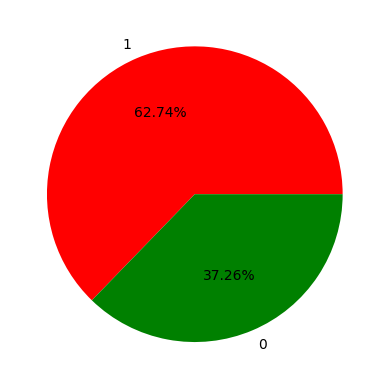

In [8]:
class_counts = df2['target'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', colors=['red', 'green'])

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data.data,
    data.target,
    test_size=0.33,
    random_state=42
)

In [12]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [13]:
y_pred = model.predict(X_test)
print(y_pred[:10])

[1 0 0 1 1 0 0 0 1 1]


In [14]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 94.15%
